In [2]:
import numpy as np
import pandas as pd
import json
from shapely.geometry import shape, Point
import time
import matplotlib.pyplot as plt
from ggplot import *

/Users/gizatm/Applications/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
nitrates_df = pd.read_csv('data/NitratesGroundwater_4326.csv')
nitrates_df.head()

,Unnamed: 0,Unnamed: 0.1,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,...,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,long,lat
0,0,1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-01-12 09:45:00,Nitrate-N,Nitrate as N,117,...,0.100,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056
1,1,2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-02-04 09:55:00,Nitrate-N,Nitrate as N,117,...,0.498,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056
2,2,3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-03-17 10:05:00,Nitrate-N,Nitrate as N,117,...,0.100,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056
3,3,4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-04-20 09:25:00,Nitrate-N,Nitrate as N,117,...,0.100,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056
4,4,5,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-05-24 13:25:00,Nitrate-N,Nitrate as N,117,...,0.100,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056


In [3]:
cropfields_df = pd.read_csv('data/cropfields_4326.csv')
cropfields_df.head()

,Unnamed: 0,ID,E,N,ID_5kmsq,OID_,UNIQUE,A1,A2,A3,...,M17,M98,L1TOL5,L9L14,L98,N98,P90,geometry,lon,lat
0,0,500131,87500,7500,5.001319e+10,0,0.000000e+00,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,POINT (-6.352077147598139 49.8859481769574),-6.352077,49.885948
1,1,500132,92500,7500,5.001329e+10,0,0.000000e+00,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,POINT (-6.28267254272897 49.8885373817449),-6.282673,49.888537
2,2,500261,87500,12500,5.002619e+10,0,0.000000e+00,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,POINT (-6.356121648555834 49.93078789271393),-6.356122,49.930788
3,3,500262,92500,12500,5.002629e+10,0,0.000000e+00,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,POINT (-6.286653033960608 49.93338118711554),-6.286653,49.933381
4,4,500277,167500,12500,5.002772e+11,763,5.002772e+11,2.04042,0.48581,13.67248,...,171.97077,279.72148,1.06781,20.00601,21.07383,23.59964,4.97716,POINT (-5.243511148962318 49.96729097961222),-5.243511,49.967291


In [4]:
len(nitrates_df)

27797

In [5]:
len(cropfields_df)

6585

In [6]:
sample_points = np.array(nitrates_df.iloc[:,19:21])

In [7]:
sample_points.shape

(27797, 2)

In [8]:
sample_points

array([[-0.28217697, 52.63105553],
       [-0.28217697, 52.63105553],
       [-0.28217697, 52.63105553],
       ...,
       [-0.60913028, 49.89196013],
       [-0.34365198, 52.61252897],
       [-0.34363722, 52.61252877]])

In [9]:
centroids = np.array(cropfields_df.iloc[:,57:59])

In [10]:
centroids.shape

(6585, 2)

In [11]:
centroids

array([[-6.35207715, 49.88594818],
       [-6.28267254, 49.88853738],
       [-6.35612165, 49.93078789],
       ...,
       [-1.96172492, 55.76583737],
       [-2.12123661, 55.81070818],
       [-2.04145895, 55.81076111]])

In [12]:
centroids[:, None].shape

(6585, 1, 2)

In [13]:
tic = time.process_time()
distance_indices = np.argmin(np.linalg.norm(sample_points - centroids[:, None], axis=2), axis=0)
toc = time.process_time()
print ("Computation time = " + str(1000*(toc - tic)) + "ms")

Computation time = 43805.096ms


In [14]:
distance_indices.shape

(27797,)

In [15]:
distance_indices

array([3786, 3786, 3786, ...,  411, 3705, 3705])

In [16]:
nitrates_df["centroid_id"] = distance_indices

In [17]:
nitrates_df.head()

,Unnamed: 0,Unnamed: 0.1,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,...,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,long,lat,centroid_id
0,0,1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-01-12 09:45:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
1,1,2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-02-04 09:55:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
2,2,3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-03-17 10:05:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
3,3,4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-04-20 09:25:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
4,4,5,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-05-24 13:25:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786


In [18]:
cropfield_usage_indices = cropfields_df.iloc[list(nitrates_df["centroid_id"].values),23]

In [19]:
wq_sample_point_indices = np.array(nitrates_df.iloc[:,11])

Text(0, 0.5, 'Water Quality Samples Indices')

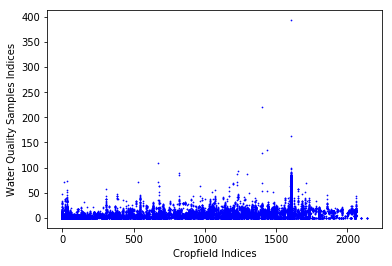

In [20]:
plt.scatter(cropfield_usage_indices, wq_sample_point_indices, color='blue', s=0.5);

plt.xlabel("Cropfield Indices")
plt.ylabel("Water Quality Samples Indices")

In [73]:
noisy_df = pd.DataFrame(columns=['Crops', 'WQ'])

i = 0

while i < len(wq_sample_point_indices):
    if(wq_sample_point_indices[i] < 12):
        noisy_df = noisy_df.append({"Crops": cropfield_usage_indices.iloc[:].values[i], "WQ": wq_sample_point_indices[i]}, ignore_index=True)
    
    i = i + 1

noisy_df


# ggplot(temppp, aes(x='Crops', y='WQ')) +\
#     geom_point() +\
#     scale_color_brewer(type='diverging', palette=4) +\
#     xlab("Cropfield Indices") + ylab("Water Quality Samples Indices") + ggtitle("Correlation")

,Crops,WQ
0,1526.78352,0.100
1,1526.78352,0.498
2,1526.78352,0.100
3,1526.78352,0.100
4,1526.78352,0.100
5,1526.78352,0.100
6,1526.78352,0.100
7,1604.52598,7.070
8,1604.52598,7.550
9,1604.52598,8.610


In [74]:
noisy_df.to_csv("noisy_df.csv")

In [75]:
noisy_df_csv = pd.read_csv('noisy_df.csv')
noisy_df_csv.head()

,Unnamed: 0,Crops,WQ
0,0,1526.78352,0.100
1,1,1526.78352,0.498
2,2,1526.78352,0.100
3,3,1526.78352,0.100
4,4,1526.78352,0.100


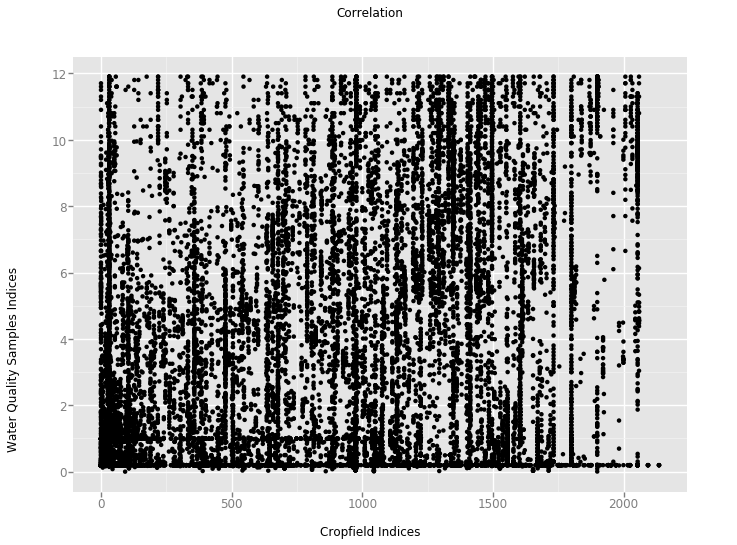

<ggplot: (7564579655)>

In [89]:
ggplot(noisy_df_csv, aes(x='Crops', y='WQ')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Cropfield Indices") + ylab("Water Quality Samples Indices") + ggtitle("Correlation") 
# +\ stat_smooth(colour='blue', se=False, span=0.2)

In [22]:
# crop_wq_merged_two_cols = crop_wq_merged_two_cols.to_frame().reset_index()
# crop_wq_merged_two_cols = crop_wq_merged_two_cols.drop("index", axis=1)

# crop_wq_merged_two_cols = crop_wq_merged_two_cols.join(pd.DataFrame(wq_sample_point_indices))

# crop_wq_merged_two_cols['c'] = wq_sample_point_indices

# crop_wq_merged_two_cols = crop_wq_merged_two_cols.rename(index=str, columns={"A99G1": "cropfield_score", 0: "wq_score"})

NameError: name 'crop_wq_merged_two_cols' is not defined

In [90]:
bin_df = pd.DataFrame(columns=['Crops', 'WQ'])

i = 0

while i < len(nitrates_df):
    if(len(nitrates_df)-i < 100):
        i_100 = len(nitrates_df) - 1
    else:
        i_100 = i + 100
        
    mean_crops = nitrates_df.iloc[i:i_100,2].mean(axis=0)
    mean_wq = nitrates_df.iloc[i:i_100,3].mean(axis=0)
    
    bin_df = bin_df.append({"Crops": mean_crops, "WQ":mean_wq}, ignore_index=True)
    
    i = i + 100

bin_df

TypeError: Could not convert http://environment.data.gov.uk/water-quality/data/measurement/AN-688504-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-689230-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1027168-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1029857-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1031851-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1035649-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1036495-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-691485-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1026726-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1029009-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1033921-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1030845-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1032194-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1033203-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1033467-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1032612-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1030988-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1033640-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1030527-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1032753-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1034554-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1034182-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1034856-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1035625-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-688507-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-691486-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1027151-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1029859-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1031854-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1035651-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1036498-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-1027048-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-690412-0117http://environment.data.gov.uk/water-quality/data/measurement/AN-690413-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513899-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513900-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513901-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513902-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513903-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513904-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513905-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1514170-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-1513906-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3432051-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409658-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424168-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3432384-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409659-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424169-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3432297-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409660-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424170-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3432386-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409661-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424171-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3432385-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409662-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424172-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3432298-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409663-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3421786-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3404710-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3421787-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3427906-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3404711-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3421788-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3428834-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3413303-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3421789-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3428835-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409664-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424173-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3427907-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409665-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3421790-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3427908-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409666-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3421791-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3432299-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3404712-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3421792-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3427909-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3413304-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424174-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3427910-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409667-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424175-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3427911-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409668-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424176-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3427912-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409669-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424177-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3428836-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409670-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424178-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3428837-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3424179-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3428838-0117http://environment.data.gov.uk/water-quality/data/measurement/MD-3409671-0117 to numeric

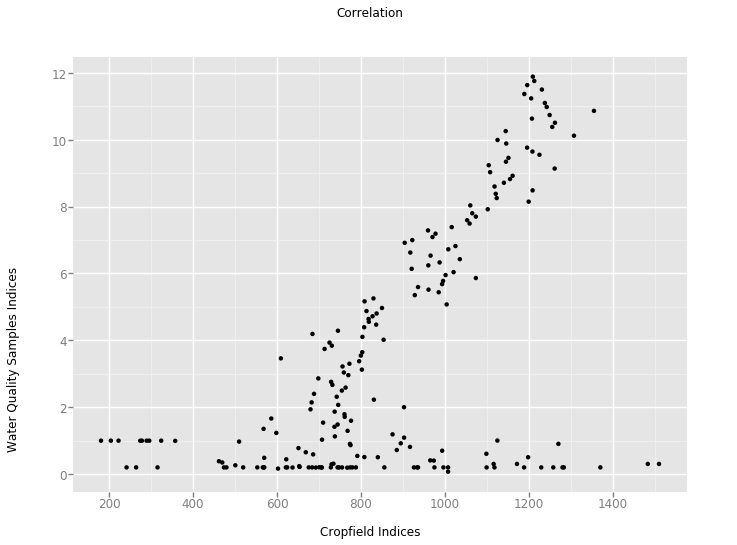

<ggplot: (-9223372029301005515)>

In [196]:
ggplot(temppp, aes(x='Crops', y='WQ')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Cropfield Indices") + ylab("Water Quality Samples Indices") + ggtitle("Correlation")

In [95]:
nitrates_df


,Unnamed: 0,Unnamed: 0.1,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,...,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,long,lat,centroid_id
0,0,1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-01-12 09:45:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
1,1,2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-02-04 09:55:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
2,2,3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-03-17 10:05:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
3,3,4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-04-20 09:25:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
4,4,5,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-05-24 13:25:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
5,5,6,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-06-16 13:30:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
6,6,7,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-FOXCVERT,HELPSTON FOX COVERT B/H,2000-07-07 13:50:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),516360,305085,-0.282177,52.631056,3786
7,7,8,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-HELPBJ02,HELPSTON BEN JOHNSONS O/FL PIPE IN CULV.,2000-02-03 14:00:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),512266,303156,-0.343294,52.614583,3705
8,8,9,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-HELPBJ02,HELPSTON BEN JOHNSONS O/FL PIPE IN CULV.,2000-03-21 14:00:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),512266,303156,-0.343294,52.614583,3705
9,9,10,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-HELPBJ02,HELPSTON BEN JOHNSONS O/FL PIPE IN CULV.,2000-04-18 13:50:00,Nitrate-N,Nitrate as N,117,...,NaN,mg/l,GROUNDWATER,False,PLANNED INVESTIGATION (LOCAL MONITORING),512266,303156,-0.343294,52.614583,3705


In [113]:
date_time = pd.read_csv('tmp.csv')

date_time_new = pd.DataFrame(columns=['Date', 'Result'])

i = 0

while (i < len(date_time) - 1):
    current_date = date_time.iloc[:].values[i][1]
    next_date = date_time.iloc[:].values[i+1][1]
    result = date_time.iloc[:].values[i][2]
    
    days = int(next_date - current_date)
    
    date_time_new = date_time_new.append({"Date": current_date, "Result": result}, ignore_index=True)

    for j in range(days - 1):
        date_time_new = date_time_new.append({"Date": current_date + j + 1, "Result": np.nan}, ignore_index=True)
    
    i+=1

date_time_new.append({"Date": 17297, "Result": 3.84}, ignore_index=True)

,Date,Result
0,12072.0,12.80
1,12073.0,NaN
2,12074.0,NaN
3,12075.0,NaN
4,12076.0,NaN
5,12077.0,NaN
6,12078.0,NaN
7,12079.0,NaN
8,12080.0,NaN
9,12081.0,NaN


In [50]:
date_time_new.to_csv("date_time_new.csv")

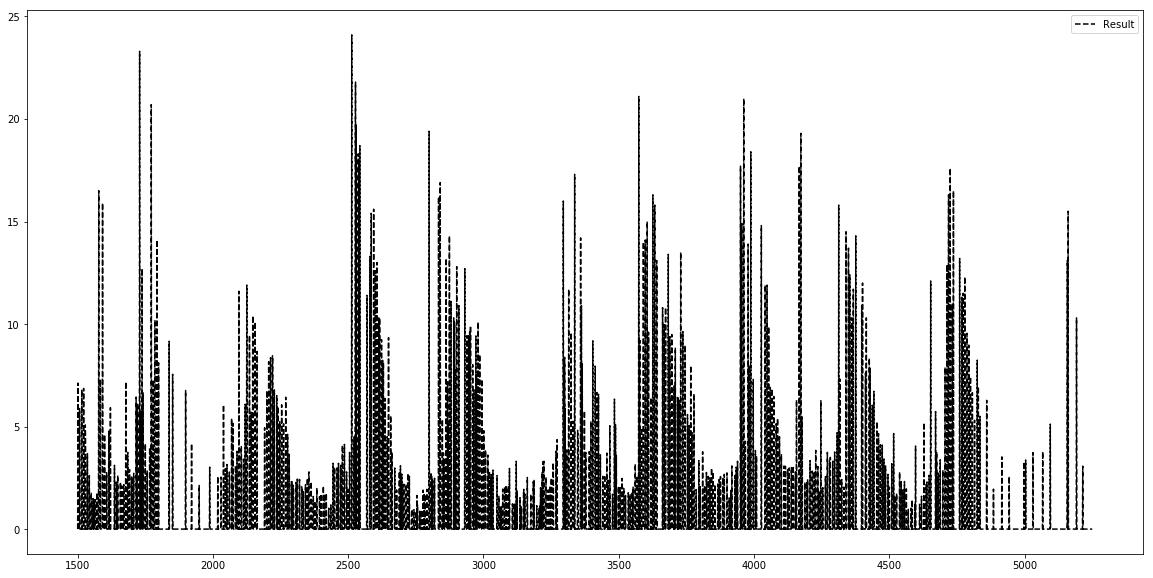

In [60]:
new_col_df_1500 = new_col_df[1500:]
#new_col_df_1500.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

In [26]:
new_col_df = pd.read_csv("date_time_new_test.csv")

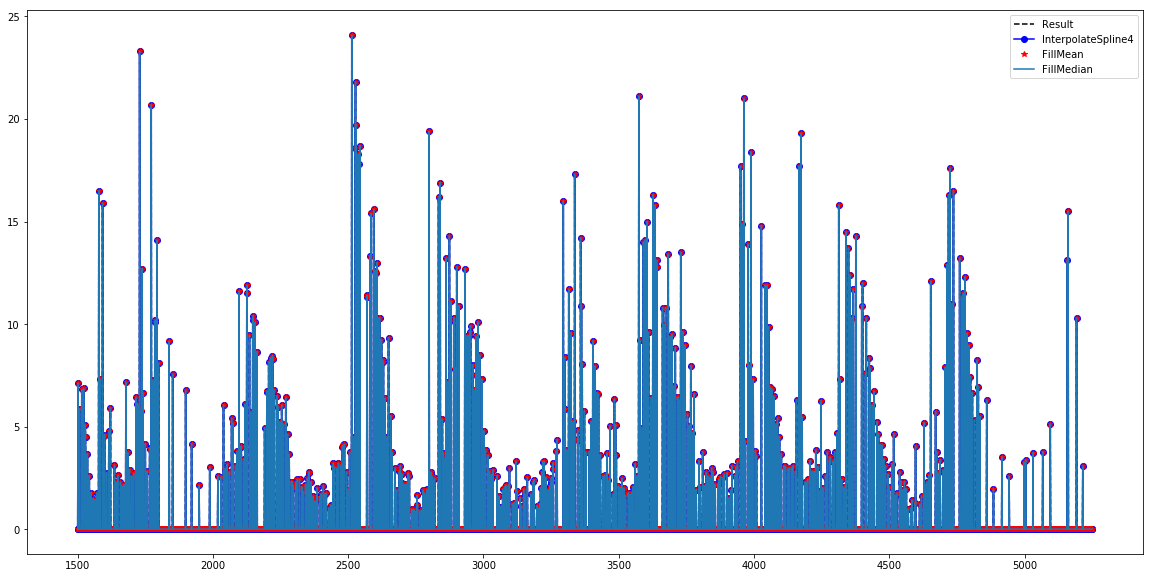

In [95]:
new_col_df_1500 = new_col_df_1500.assign(FillMean=new_col_df_1500.Result.fillna(new_col_df_1500.Result.mean()))
#new_col_df_1500 = new_col_df_1500.assign(FillMedian=new_col_df_1500.Result.fillna(new_col_df_1500.Result.median()))
new_col_df_1500.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

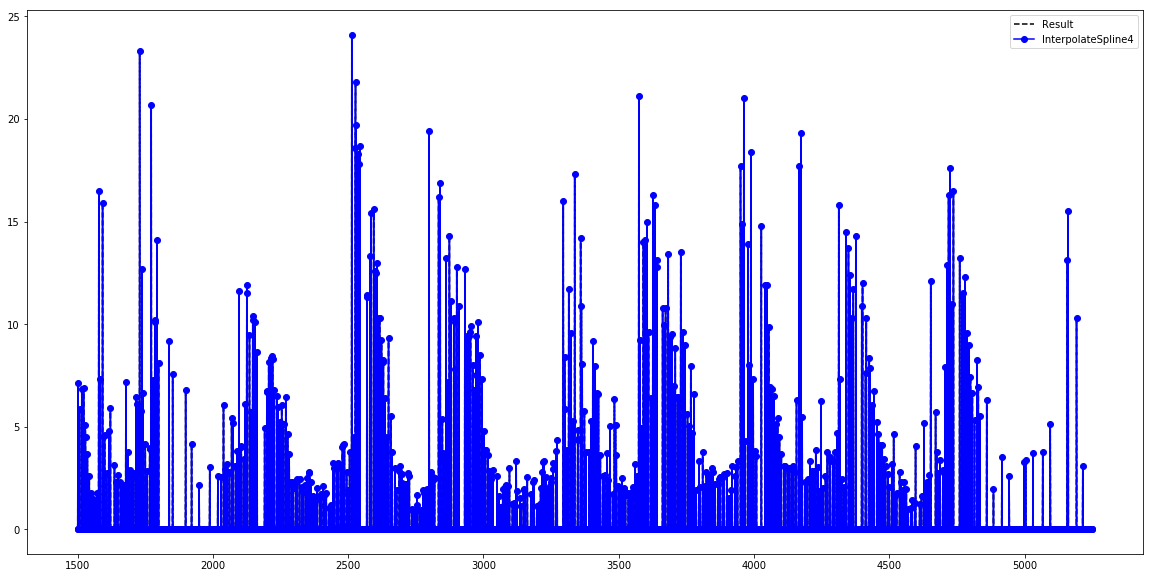

In [52]:
new_col_df_1500 = new_col_df_1500.assign(InterpolateSpline4=new_col_df_1500.Result.interpolate(method='spline', order=4))
new_col_df_1500.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

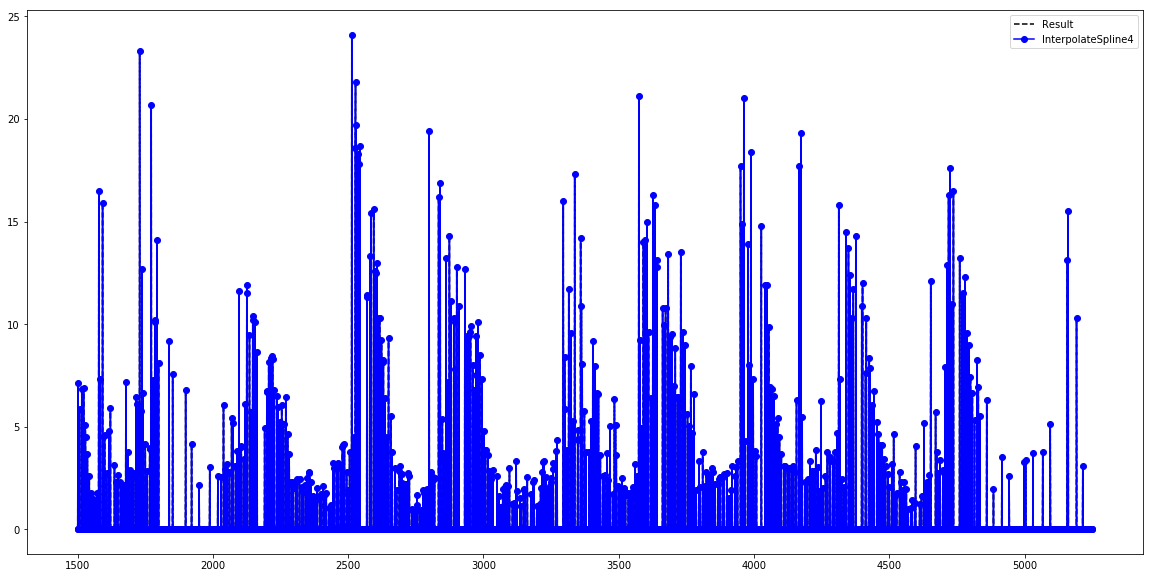

In [75]:
new_col_df_1500 = new_col_df_1500.assign(InterpolateSpline4=new_col_df_1500.Result.interpolate(method='linear', order=4))
new_col_df_1500.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

In [76]:
new_col_df_1500

,Result,InterpolateSpline4
1500,0.00,0.00
1501,7.12,7.12
1502,0.00,0.00
1503,0.00,0.00
1504,0.00,0.00
1505,0.00,0.00
1506,0.00,0.00
1507,5.88,5.88
1508,0.00,0.00
1509,0.00,0.00


In [109]:
new_col_df_1500 = new_col_df_1500.assign(FillMean=new_col_df_1500.Result.fillna(new_col_df_1500.Result.mean()))

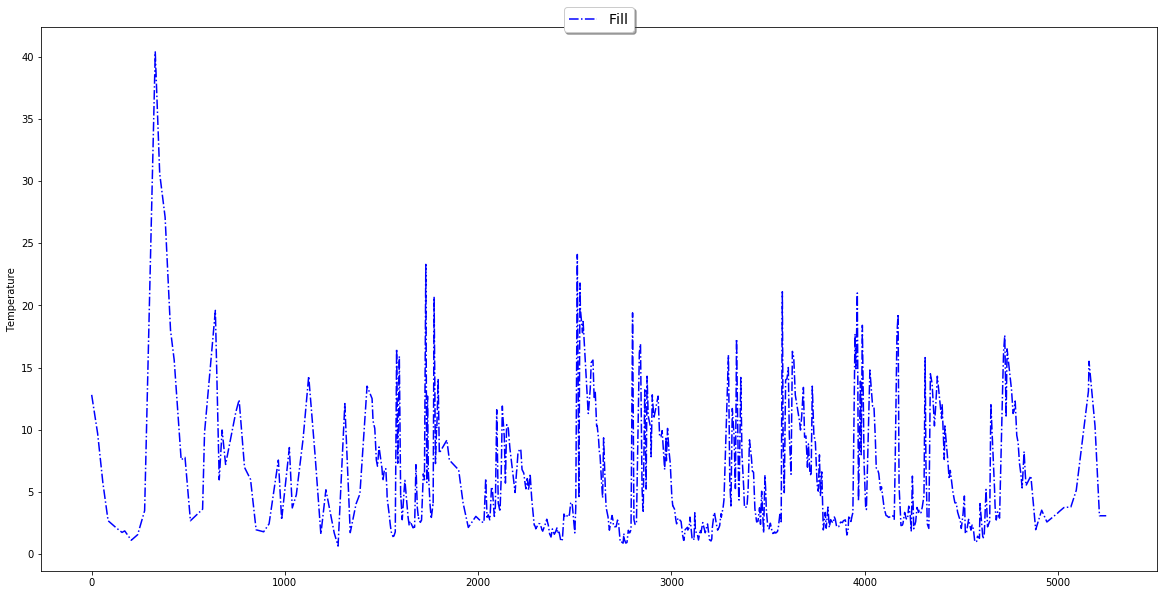

In [134]:
final_df= date_time_new[['Fill']]
final_df.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10));
plt.ylabel('Temperature');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14} );

In [114]:
df_na_result = date_time_new[['Result']]

In [115]:
df_na_result

,Result
0,12.8
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [130]:
date_time_new = date_time_new.assign(Fill=date_time_new.Result.interpolate(method='linear'))

In [124]:
date_time_new.Fill = date_time_new.Fill.fillna(tmp_mean)

In [131]:
date_time_new

,Date,Result,Fill
0,12072.0,12.8,12.800000
1,12073.0,NaN,12.700667
2,12074.0,NaN,12.601333
3,12075.0,NaN,12.502000
4,12076.0,NaN,12.402667
5,12077.0,NaN,12.303333
6,12078.0,NaN,12.204000
7,12079.0,NaN,12.104667
8,12080.0,NaN,12.005333
9,12081.0,NaN,11.906000


In [135]:
final_df.to_csv("final_df.csv")